In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score,roc_auc_score

In [2]:
df=pd.read_csv("C:/Users/Administrator/Downloads/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.drop(columns=['Unnamed: 32'], inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
X=df.drop(columns=['diagnosis'])
y=df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [13]:
nums_cols=X.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_cols=X.select_dtypes(include=['object']).columns.to_list()

In [16]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),nums_cols),
        ('cat', LabelEncoder(), cat_cols)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['id', 'radius_mean', 'texture_mean',
                                  'perimeter_mean', 'area_mean',
                                  'smoothness_mean', 'compactness_mean',
                                  'concavity_mean', 'concave points_mean',
                                  'symmetry_mean', 'fractal_dimension_mean',
                                  'radius_se', 'texture_se', 'perimeter_se',
                                  'area_se', 'smoothness_se', 'compactness_se',
                                  'concavity_se', 'concave points_se',
                                  'symmetry_se', 'fractal_dimension_se',
                                  'radius_worst', 'texture_worst',
                                  'perimeter_worst', 'area_worst',
                                  'smoothness_worst', 'compactness_worst',
                                  'concavity_worst', 'concave points_worst',
                                  'symmetry_worst', ...]),
                                ('cat', LabelEncoder(), [])])

In [17]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['id', 'radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst', ...]),
                                                 ('cat', LabelEncoder(), [])])),
                ('classifier', LogisticRegression())])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['id', 'radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst', ...]),
                                                 ('cat', LabelEncoder(), [])])),
                ('classifier', LogisticRegression())])

In [20]:
y_pred= pipeline.predict(X_test)

In [22]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Precision: {precision_score(y_test, y_pred)}')
print('\n')
print(f'Recall: {recall_score(y_test, y_pred)}')
print('\n')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print('\n')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(cm)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158


Precision: 0.9873417721518988


Recall: 0.9397590361445783


F1 Score: 0.9629629629629629


ROC AUC Score: 0.9664312422102203

Confusion Matrix:
[[144   1]
 [  5  78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       145
           1       0.99      0.94      0.96        83

    accuracy                           0.97       228
   macro avg       0.98      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



In [29]:
y_prob = pipeline.predict_proba(X_test)[:, 1]

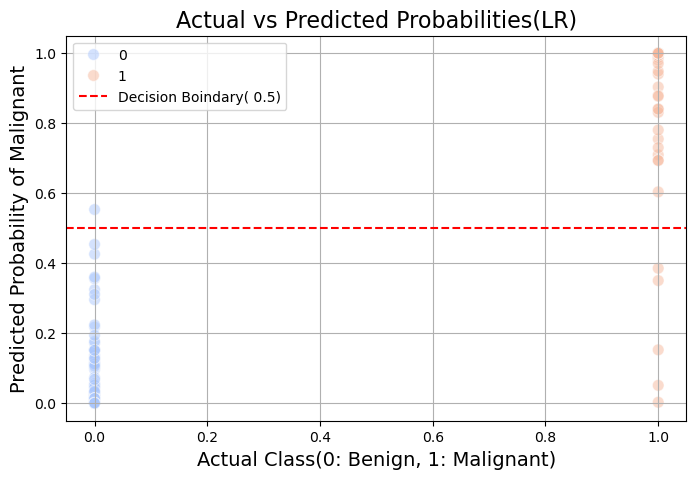

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_prob, hue=y_test,alpha=0.5,palette='coolwarm',s=70)
plt.axhline(y=0.5, color='red', linestyle='--', label='Decision Boindary( 0.5)')
#plt.plot([0,1],[0,1],ls='-',lw=4)  # Diagonal line for reference
plt.xlabel('Actual Class(0: Benign, 1: Malignant)',fontsize=14)
plt.ylabel('Predicted Probability of Malignant', fontsize=14)
plt.title('Actual vs Predicted Probabilities(LR)', fontsize=16)
#plt.ylabel('Predicted Labels')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [37]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [39]:
X_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
107,863270,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,...,13.29,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185
437,909220,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,...,15.66,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234
195,875878,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,...,13.88,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
141,869104,16.110,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,...,19.92,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158
319,894335,12.430,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,871201,19.590,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.2027,...,26.73,26.39,174.90,2232.0,0.14380,0.38460,0.68100,0.22470,0.3643,0.09223
321,894618,20.160,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,...,23.06,23.03,150.20,1657.0,0.10540,0.15370,0.26060,0.14250,0.3055,0.05933
388,903011,11.270,15.50,73.38,392.0,0.08365,0.11140,0.10070,0.02757,0.1810,...,12.04,18.93,79.73,450.0,0.11020,0.28090,0.30210,0.08272,0.2157,0.10430
176,872608,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,...,11.26,24.39,73.07,390.2,0.13010,0.29500,0.34860,0.09910,0.2614,0.11620


In [43]:
arr=np.array([1,2,4,3,5,6,])
arr_idx=np.argsort(arr)
print(arr_idx)
print('\n')
arr_sorted=arr[arr_idx]
print(f"Original Array: {arr}")
print('\n')
print(f"Sorted Array: {arr_sorted}")

[0 1 3 2 4 5]


Original Array: [1 2 4 3 5 6]


Sorted Array: [1 2 3 4 5 6]


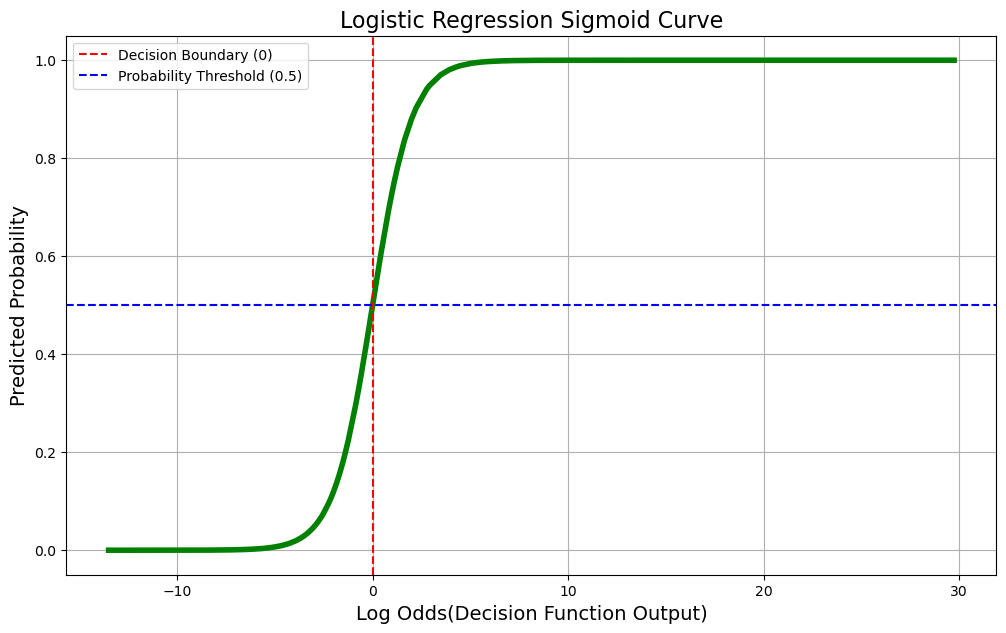

In [35]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

log_odds=pipeline.decision_function(X_test)

probabilities=sigmoid(log_odds)

sorted_idx=np.argsort(log_odds)
log_odds_sorted=log_odds[sorted_idx]
prob_sorted=probabilities[sorted_idx]

plt.figure(figsize=(12, 7))
plt.plot(log_odds_sorted,prob_sorted,color='green',lw=4)
plt.axvline(x=0, color='red', linestyle='--', label='Decision Boundary (0)')
plt.axhline(y=0.5, color='blue', linestyle='--', label='Probability Threshold (0.5)')
plt.title('Logistic Regression Sigmoid Curve', fontsize=16)
plt.xlabel('Log Odds(Decision Function Output)', fontsize=14)
plt.ylabel('Predicted Probability', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [46]:
print(log_odds)

[ -5.47011399  -3.50954533  -5.27852584   3.93438084  -9.62405516
  -6.79775767  -8.14445418  19.54636167  -4.46224376  -5.97966044
   6.5410781   -5.20382194  -2.24179289  -6.83291077   6.76791063
  -5.75110882  -6.9141343   -7.9050704   15.88231996   1.12527988
  -2.97925547  -7.74706502  -4.72545198  -6.18374469   5.92587175
  -3.71619861   7.07526509 -12.94008462   9.88709808   4.89604621
  -0.29799102   5.32424489  -1.99822616   2.23591241  -9.41445798
 -10.41300676   5.03702183   1.98786468  11.10511107  16.67198051
   5.60904422  -5.41592771  -6.51012325  -2.5334038   -9.94652434
  -5.23409266  10.84591004  -0.73331928   1.26889217  -7.68097832
   8.57448923  -1.70075362  -3.51886318  20.81921233  -5.954869
  -6.00883998  11.21475109  13.61416138  -6.1782915   -7.70360118
   7.55029558   0.42150568  -3.57024205  -8.67140517  14.03016662
  -2.8143243   -2.06147825  16.76370954   8.3103611   -4.38067995
  11.5394289   -9.03175249  -9.20182006  -7.67088164   8.02400218
  16.7356620

In [47]:
#print('\n')
print(probabilities)

[4.19309605e-03 2.90418541e-02 5.07406596e-03 9.80817365e-01
 6.61145789e-05 1.11503071e-03 2.90256810e-04 9.99999997e-01
 1.14048775e-02 2.52330197e-03 9.98559147e-01 5.46548502e-03
 9.60597482e-02 1.07655634e-03 9.98851226e-01 3.16917802e-03
 9.92654942e-04 3.68732465e-04 9.99999873e-01 7.54966766e-01
 4.83718893e-02 4.31822066e-04 8.78877792e-03 2.05844331e-03
 9.97337628e-01 2.37485524e-02 9.99154946e-01 2.39989152e-06
 9.99949176e-01 9.92579394e-01 4.26048669e-01 9.95151593e-01
 1.19389290e-01 9.03428422e-01 8.15299994e-05 3.00383157e-05
 9.93548831e-01 8.79517048e-01 9.99984965e-01 9.99999943e-01
 9.96348810e-01 4.42553958e-03 1.48608454e-03 7.35493749e-02
 4.78915137e-05 5.30338409e-03 9.99980516e-01 3.24466756e-01
 7.80553047e-01 4.61310256e-04 9.99811173e-01 1.54366864e-01
 2.87802552e-02 9.99999999e-01 2.58647630e-03 2.45091487e-03
 9.99986526e-01 9.99998777e-01 2.06967577e-03 4.50995913e-04
 9.99474322e-01 6.03843490e-01 2.73783648e-02 1.71388685e-04
 9.99999193e-01 5.655500

In [48]:
#print('\n')
print(log_odds_sorted)

[-13.49321675 -12.94008462 -11.30091334 -10.96237881 -10.9568176
 -10.8818151  -10.7337926  -10.70825028 -10.57130208 -10.41300676
  -9.94652434  -9.92871305  -9.63003     -9.62405516  -9.5222899
  -9.41445798  -9.20182006  -9.13541626  -9.03175249  -8.99594468
  -8.8698646   -8.73947884  -8.67140517  -8.65414447  -8.53821355
  -8.44239129  -8.38605709  -8.32687775  -8.26863252  -8.25463639
  -8.14445418  -8.11225194  -7.9050704   -7.84515044  -7.8346827
  -7.74706502  -7.73322491  -7.71719248  -7.71024017  -7.70360118
  -7.68097832  -7.67088164  -7.56595346  -7.2541602   -7.23575728
  -7.08229117  -6.9141343   -6.83291077  -6.79775767  -6.76673677
  -6.51012325  -6.42502381  -6.37013997  -6.24985446  -6.18374469
  -6.1782915   -6.11606683  -6.00883998  -6.00418473  -5.97966044
  -5.954869    -5.90389205  -5.89587689  -5.89119789  -5.8730574
  -5.79520881  -5.77476768  -5.75110882  -5.70762736  -5.67340736
  -5.5200659   -5.51577524  -5.47011399  -5.41592771  -5.39016331
  -5.27852584 

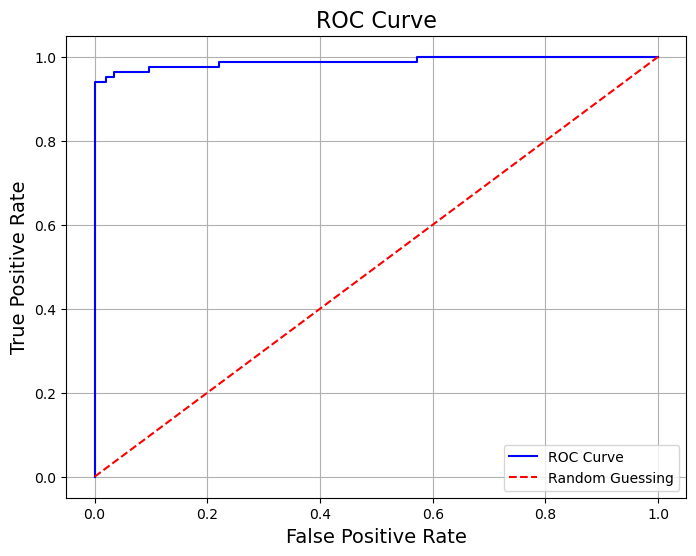

In [33]:
#Plotting ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

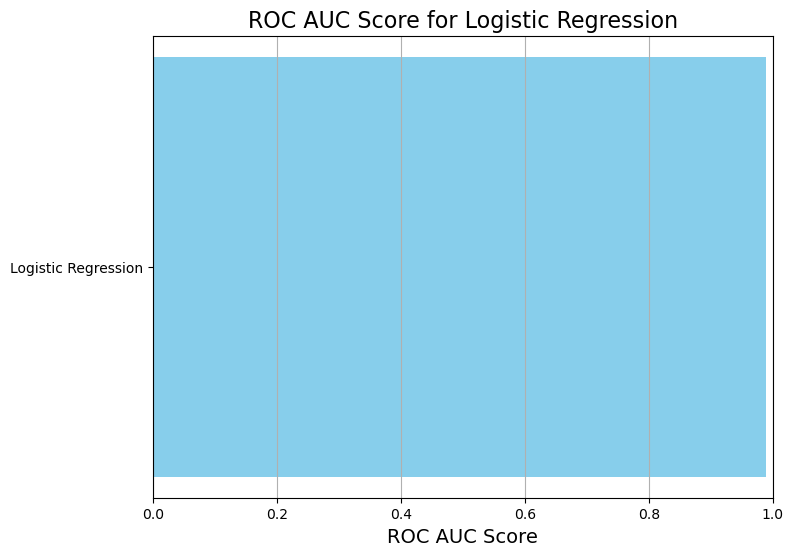

In [34]:
#Plotting ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.barh(['Logistic Regression'], [roc_auc], color='skyblue')
plt.xlim(0, 1)
plt.xlabel('ROC AUC Score', fontsize=14)
plt.title('ROC AUC Score for Logistic Regression', fontsize=16)
plt.grid(axis='x')
plt.show()